## Demo facial keypointing in a video

#### Play the video with no facial keypoints

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
model = torch.load(r'models\best_models\best_resnet50_8.pth')
model = model.to(device)
model.eval();

In [3]:
import cv2
import time

# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid1.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width)
print(frame_height)

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        # time.sleep(1/fps)
        # cv2.imshow('frame',frame)
 
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            image = frame.copy()
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image / 255.0
            image = image.transpose((2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        for i in range(outputs.shape[0]):
            x = int(outputs[i, 0])
            y = int(outputs[i, 1])
            cv2.circle(image_copy, (x, y), 1, (0, 255, 0), -1, cv2.LINE_AA)


            # experiment with keypoint locations
            # if i in [51, 33]:
            #     x = int(outputs[i, 0])
            #     y = int(outputs[i, 1])
            #     cv2.circle(image_copy, (x, y), 1, (0, 0, 255), -1, cv2.LINE_AA)

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

640
480


## Now make some image filters

Image shape:  (1123, 3064, 4)


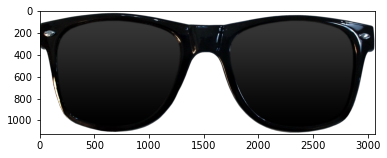

In [4]:
import matplotlib.pyplot as plt

# load in sunglasses image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(sunglasses)

# print out its dimensions
print('Image shape: ', sunglasses.shape)

The alpha channel looks like this (black pixels = transparent): 


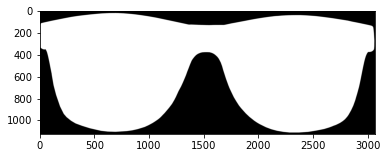

In [5]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray');

#### Prepare sunglasses filter

In [6]:
def prep_sunglasses(key_pts):
    # top-left location for sunglasses to go
    # 17 = edge of left eyebrow
    x = int(key_pts[17, 0])
    y = int(key_pts[17, 1])

    # height and width of sunglasses
    # h = length of nose
    h = int(abs(key_pts[27,1] - key_pts[34,1]))
    # w = left to right eyebrow edges
    w = int(abs(key_pts[17,0] - key_pts[26,0]))

    # read in sunglasses
    sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
    # resize sunglasses
    new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

    return new_sunglasses

In [7]:
import numpy as np

# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid1.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width)
print(frame_height)

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        # time.sleep(1/fps)
        # cv2.imshow('frame',frame)
 
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            image = frame.copy()
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image / 255.0
            image = image.transpose((2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        # for i in range(outputs.shape[0]):
        #     x = int(outputs[i, 0])
        #     y = int(outputs[i, 1])
        #     cv2.circle(image_copy, (x, y), 3, (0, 255, 0), -1, cv2.LINE_AA)

        # apply sunglasses filter to image
        # get region of interest on the face to change

        # top-left location for sunglasses to go
        # 17 = edge of left eyebrow
        x = int(outputs[17, 0])
        y = int(outputs[17, 1])

        # height and width of sunglasses
        # h = length of nose
        h = int(abs(outputs[27,1] - outputs[34,1]))
        # w = left to right eyebrow edges
        w = int(abs(outputs[17,0] - outputs[26,0]))

        # read in sunglasses
        sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
        # resize sunglasses
        new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

        # get region of interest for sun glasses
        roi_color = image_copy[y:y+h,x:x+w]

        # find all non-transparent pts
        ind = np.argwhere(new_sunglasses[:,:,3] > 0)

        # for each non-transparent point, replace the original image pixel with that of the new_sunglasses
        for i in range(3):
            roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
        # set the area of the image to the changed region with sunglasses
        image_copy[y:y+h,x:x+w] = roi_color

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

640
480


In [45]:
ind

array([[ 1, 10],
       [ 1, 11],
       [ 1, 12],
       ...,
       [36, 71],
       [36, 72],
       [36, 73]], dtype=int64)

### Make a Mustache filter

In [8]:
# use cv2.IMREAD_UNCHANGED to load the .png format alpha channel 
mustache = cv2.imread('images\moustache.png', cv2.IMREAD_UNCHANGED)
mustache.shape

(480, 960, 4)

In [10]:
import numpy as np

# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid1.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        # time.sleep(1/fps)
        # cv2.imshow('frame',frame)
 
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            image = frame.copy()
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image / 255.0
            image = image.transpose((2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        # for i in range(outputs.shape[0]):
        #     x = int(outputs[i, 0])
        #     y = int(outputs[i, 1])
        #     cv2.circle(image_copy, (x, y), 1, (0, 255, 0), -1, cv2.LINE_AA)

        # apply sunglasses filter to image
        # get region of interest on the face to change

        # top-left location for mustache
        # x = int(outputs[48, 0])
        # y = int(outputs[48, 1])

        # maybe use center location for mustache?
        x = int(outputs[51, 0])
        y = int(outputs[51, 1])

        # height and width of mustache
        # h = height of lips
        h = int(abs(outputs[33,1] - outputs[57,1]))
        # w = length of lips
        w = int(abs(outputs[55,0] - outputs[41,0]))

        # print(x)
        # print(y)
        # print(h)
        # print(w)
      

        # read in sunglasses
        mustache = cv2.imread('images\moustache.png', cv2.IMREAD_UNCHANGED)
        # resize sunglasses
        new_mustache =  cv2.resize(mustache, (w, h), interpolation = cv2.INTER_CUBIC)

        # get region of interest for mustache
        # roi_color = image_copy[y:y+h,x:x+w]
        roi_color = image_copy[int(y-h/2):int(y+h/2),int(x-w/2):int(x+w/2)] # when using center loc
        # print(roi_color.shape)

        # find all non-transparent pts
        ind = np.argwhere(new_mustache[:,:,3] > 0)

        # for each non-transparent point, replace the original image pixel with that of the new_mustache
        for i in range(3):
            roi_color[ind[:,0],ind[:,1],i] = new_mustache[ind[:,0],ind[:,1],i]    
        # set the area of the image to the changed region with mustache
        # image_copy[y:y+h,x:x+w] = roi_color
        image_copy[int(y-h/2):int(y+h/2),int(x-w/2):int(x+w/2)] = roi_color # when using center loc

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

In [11]:
googly_eye = cv2.imread('images\googly_eye.png', cv2.IMREAD_UNCHANGED)
googly_eye.shape

(292, 292, 4)

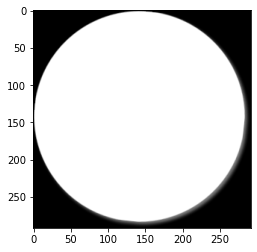

In [12]:
plt.imshow(googly_eye[:, :, 3], cmap='gray')

In [13]:
# locations for googly eye(s)
# left 38, 
# width -> 28 - 38, height -> 20 - 42
# 
# right - 45
# width -> 45 - 28, height -> 25 - 47

In [14]:
import numpy as np

# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid2.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        # time.sleep(1/fps)
        # cv2.imshow('frame',frame)
 
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            image = frame.copy()
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image / 255.0
            image = image.transpose((2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        # for i in range(outputs.shape[0]):
        #     x = int(outputs[i, 0])
        #     y = int(outputs[i, 1])
        #     cv2.circle(image_copy, (x, y), 1, (0, 255, 0), -1, cv2.LINE_AA)

        # apply googly eye filter to image

        # locations for googly eye(s)
        # left 38, 
        # width -> 28 - 38, height -> 20 - 42
        # 
        # right - 45
        # width -> 45 - 28, height -> 25 - 47

        # get center of eye
        x_left = int(abs(outputs[39,0] + outputs[36,0])) // 2 # int(outputs[37, 0])
        y_left = int(outputs[37, 1])

        x_right = int(abs(outputs[45,0] + outputs[42,0])) // 2 # int(outputs[45, 0])
        y_right = int(outputs[45, 1])

        # scale width and height by a factor of 2 
        # get eye width
        w_left = int(abs(outputs[27,0] - outputs[37,0])) * 2
        w_right = int(abs(outputs[44,0] - outputs[27,0])) * 2

        # get eye height
        h_left = int(abs(outputs[19,1] - outputs[41,1])) * 2
        h_right = int(abs(outputs[24,1] - outputs[46,1])) * 2

        # read in googly_eye
        googly_eye = cv2.imread('images\googly_eye.png', cv2.IMREAD_UNCHANGED)

        # get googly eyes for left and right
        googly_eye_left =  cv2.resize(googly_eye, (w_left, h_left), interpolation = cv2.INTER_CUBIC)
        googly_eye_right =  cv2.resize(googly_eye, (w_right, h_right), interpolation = cv2.INTER_CUBIC)

        # get region of interest for mustache
        # roi_color = image_copy[y:y+h,x:x+w]
        roi_color_left = image_copy[int(y_left-h_left/2):int(y_left+h_left/2),
                                    int(x_left-w_left/2):int(x_left+w_left/2)] 
        roi_color_right = image_copy[int(y_right-h_right/2):int(y_right+h_right/2),
                                     int(x_right-w_right/2):int(x_right+w_right/2)] 
        # print(roi_color.shape)

        # find all non-transparent pts
        ind_left = np.argwhere(googly_eye_left[:,:,3] > 0)
        ind_right = np.argwhere(googly_eye_right[:,:,3] > 0)

        # for each non-transparent point, replace the original image pixel with that of the new_mustache
        for i in range(3):
            roi_color_left[ind_left[:,0],ind_left[:,1],i] = googly_eye_left[ind_left[:,0],ind_left[:,1],i] 
            roi_color_right[ind_right[:,0],ind_right[:,1],i] = googly_eye_right[ind_right[:,0],ind_right[:,1],i]    

        # set the area of the image to the changed region(s) with googly eyes
        image_copy[int(y_left-h_left/2):int(y_left+h_left/2),
                   int(x_left-w_left/2):int(x_left+w_left/2)] = roi_color_left

        image_copy[int(y_right-h_right/2):int(y_right+h_right/2),
                   int(x_right-w_right/2):int(x_right+w_right/2)] = roi_color_right

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

## Try with face detector cascaade

In [15]:
# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid2.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width)
print(frame_height)

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        # time.sleep(1/fps)
        # cv2.imshow('frame',frame)

        # detect face in image
        image = frame.copy()

        # load in a haar cascade classifier for detecting frontal faces
        face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

        # run the detector
        # the output here is an array of detections; the corners of each detection box
        # if necessary, modify these parameters until you successfully identify every face in a given image
        faces = face_cascade.detectMultiScale(image, 11, 2)

        # make a copy of the original image to plot detections on
        image_with_detections = image.copy()

        
 
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image / 255.0
            image = image.transpose((2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        for i in range(outputs.shape[0]):
            x = int(outputs[i, 0])
            y = int(outputs[i, 1])
            cv2.circle(image_copy, (x, y), 1, (0, 255, 0), -1, cv2.LINE_AA)


            # experiment with keypoint locations
            # if i in [51, 33]:
            #     x = int(outputs[i, 0])
            #     y = int(outputs[i, 1])
            #     cv2.circle(image_copy, (x, y), 1, (0, 0, 255), -1, cv2.LINE_AA)

        # loop over the detected faces, mark the image where each face is found
        for (x,y,w,h) in faces:
            # draw a rectangle around each detected face
            # you may also need to change the width of the rectangle drawn depending on image resolution
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),3) 

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

640
480


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


## Try with grayscal model

In [156]:
model_gray = torch.load(r'models\best_resnet.pth')
model_gray = model_gray.to(device)
model_gray.eval();

In [157]:
# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid2.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width)
print(frame_height)

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # detect face in image
        image = frame.copy()

        # load in a haar cascade classifier for detecting frontal faces
        face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

        # run face detector
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(image_gray, 11, 2)

 
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            image = frame.copy()
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = image / 255.0
            # image = image.transpose((2, 0, 1))
            image = np.array([image, image, image]) # grayscale image

            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model_gray(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        for i in range(outputs.shape[0]):
            x = int(outputs[i, 0])
            y = int(outputs[i, 1])
            cv2.circle(image_copy, (x, y), 1, (0, 255, 0), -1, cv2.LINE_AA)


            # experiment with keypoint locations
            # if i in [51, 33]:
            #     x = int(outputs[i, 0])
            #     y = int(outputs[i, 1])
            #     cv2.circle(image_copy, (x, y), 1, (0, 0, 255), -1, cv2.LINE_AA)

        # loop over the detected faces, mark the image where each face is found
        for (x,y,w,h) in faces:
            # draw a rectangle around each detected face
            # you may also need to change the width of the rectangle drawn depending on image resolution
            cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),1) 

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

640
480


In [155]:
# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('videos/vid2.mp4')

# FRAMES PER SECOND FOR VIDEO
fps = 25

# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# get frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
        # pass video through model
        with torch.no_grad():

            # prepare image for model
            image = frame.copy()
            image = cv2.resize(image, (224, 224))
            image_copy = image.copy() # save for later
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = image / 255.0
            # image = image.transpose((2, 0, 1))
            image = np.array([image, image, image]) # grayscal image
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(device)

            # get model output
            outputs = model_gray(image)
            
        # prepare output keypoints
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)

        # draw facial keypoints on image
        # for i in range(outputs.shape[0]):
        #     x = int(outputs[i, 0])
        #     y = int(outputs[i, 1])
        #     cv2.circle(image_copy, (x, y), 1, (0, 255, 0), -1, cv2.LINE_AA)

        # apply googly eye filter to image

        # get center of eye
        x_left = int(abs(outputs[39,0] + outputs[36,0])) // 2 # int(outputs[37, 0])
        y_left = int(outputs[37, 1])

        x_right = int(abs(outputs[45,0] + outputs[42,0])) // 2 # int(outputs[45, 0])
        y_right = int(outputs[45, 1])

        # scale width and height by a factor of 2 
        # get eye width
        w_left = int(abs(outputs[27,0] - outputs[37,0])) * 2
        w_right = int(abs(outputs[44,0] - outputs[27,0])) * 2

        # get eye height
        h_left = int(abs(outputs[19,1] - outputs[41,1])) * 2
        h_right = int(abs(outputs[24,1] - outputs[46,1])) * 2

        # read in googly_eye
        googly_eye = cv2.imread('images\googly_eye.png', cv2.IMREAD_UNCHANGED)

        # get googly eyes for left and right
        googly_eye_left =  cv2.resize(googly_eye, (w_left, h_left), interpolation = cv2.INTER_CUBIC)
        googly_eye_right =  cv2.resize(googly_eye, (w_right, h_right), interpolation = cv2.INTER_CUBIC)

        # get region of interest for mustache
        roi_color_left = image_copy[int(y_left-h_left/2):int(y_left+h_left/2),
                                    int(x_left-w_left/2):int(x_left+w_left/2)] 
        roi_color_right = image_copy[int(y_right-h_right/2):int(y_right+h_right/2),
                                     int(x_right-w_right/2):int(x_right+w_right/2)] 

        # find all non-transparent pts
        ind_left = np.argwhere(googly_eye_left[:,:,3] > 0)
        ind_right = np.argwhere(googly_eye_right[:,:,3] > 0)

        # for each non-transparent point, replace the original image pixel with that of the new_mustache
        for i in range(3):
            roi_color_left[ind_left[:,0],ind_left[:,1],i] = googly_eye_left[ind_left[:,0],ind_left[:,1],i] 
            roi_color_right[ind_right[:,0],ind_right[:,1],i] = googly_eye_right[ind_right[:,0],ind_right[:,1],i]    

        # set the area of the image to the changed region(s) with googly eyes
        image_copy[int(y_left-h_left/2):int(y_left+h_left/2),
                   int(x_left-w_left/2):int(x_left+w_left/2)] = roi_color_left

        image_copy[int(y_right-h_right/2):int(y_right+h_right/2),
                   int(x_right-w_right/2):int(x_right+w_right/2)] = roi_color_right

        # resize to original frame size for nice display
        image_frame = cv2.resize(image_copy, (frame_width, frame_height))

        # display frame
        cv2.imshow('frame', image_frame)
        # break

        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()